In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from matplotlib import pyplot as plt
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore


200/200 [==============================] - 405s 2s/step - Score: 934.5268 - TotalVariation2D: 22.8585 - Norm: 39.0787


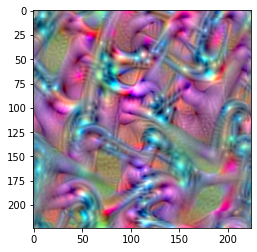

In [3]:
# Create the visualization instance.
# All visualization classes accept a model and model-modifier, which, for example,
#     replaces the activation of last layer to linear function so on, in constructor.
activation_maximization = \
   ActivationMaximization(VGG16(),
                          model_modifier=[ExtractIntermediateLayer('block5_conv3'),
                                          ReplaceToLinear()],
                          clone=False)

FILTER_INDEX = 1
# You can use Score class to specify visualizing target you want.
# And add regularizers or input-modifiers as needed.
activations = \
   activation_maximization(CategoricalScore(FILTER_INDEX),
                           steps=200,
                           input_modifiers=[Jitter(jitter=16), Rotate2D(degree=1)],
                           regularizers=[TotalVariation2D(weight=1.0),
                                         Norm(weight=0.3, p=1)],
                           optimizer=tf.keras.optimizers.RMSprop(1.0, 0.999),
                           callbacks=[Progress()])

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)

# Render
plt.imshow(activations[0])